# Step 1: Understand the Problem
The goal is to group similar movie reviews into clusters that represent genres (e.g., action, comedy, drama). Since the IMDB dataset doesn't explicitly provide genres for reviews, we will use unsupervised learning to discover patterns in the text.

# Step 2: Load and Explore the Dataset
The IMDB dataset contains 50,000 movie reviews labeled as positive or negative. For clustering, we will ignore the labels and focus on the text.

In [63]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [64]:
# Load the IMDB dataset
dataset = pd.read_csv("IMDB Dataset.csv")

# Access the 'review' column directly
reviews = dataset['review'][:30000]  # Use a subset for efficiency

# Explore the dataset
print(f"Number of reviews: {len(reviews)}")
print("\nSample review:", reviews[0])

Number of reviews: 30000

Sample review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the 

In [65]:
reviews.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [66]:
reviews.isnull().sum()

0

In [67]:
reviews[100]

"This short film that inspired the soon-to-be full length feature - Spatula Madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. The short film stars Edward the Spatula who after being fired from his job, joins in the fight against the evil spoons. This premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. This film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. Unfortunately not much else lies below it. The plot that is set up doesn't really have time to show. But it's surely follows it plot better than many high-budget Hollywood films. This film is worth watching at least a few times. Take it for what it is, and don't expect a deep story."

# Step 3: Preprocess the Text
Text data needs to be converted into numerical features for clustering.

# 3.1 Tokenization and TF-IDF Vectorization
We will use TF-IDF to convert text into numerical features

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
def remove_html(data):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', data)

reviews=reviews.apply(remove_html)
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
reviews=reviews.apply(remove_url)
def remove_emoji(text):
    # Define a regex pattern for emoji characters
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    # Use the pattern to substitute emojis with an empty string
    return emoji_pattern.sub(r'', text)
reviews=reviews.apply(remove_emoji)
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
reviews=reviews.apply(remove_punct)
def remove_mostWordre(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]


# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',  # Remove common words
    max_features=2000,     # Limit vocabulary size
    lowercase=True         # Convert text to lowercase

)

# Fit and transform the reviews
X = tfidf.fit_transform(reviews)
print(f"Shape of TF-IDF matrix: {X.shape}")

Shape of TF-IDF matrix: (30000, 2000)


# Step 4: Determine the Optimal Number of Clusters
We will use the Elbow Method to find the optimal number of clusters

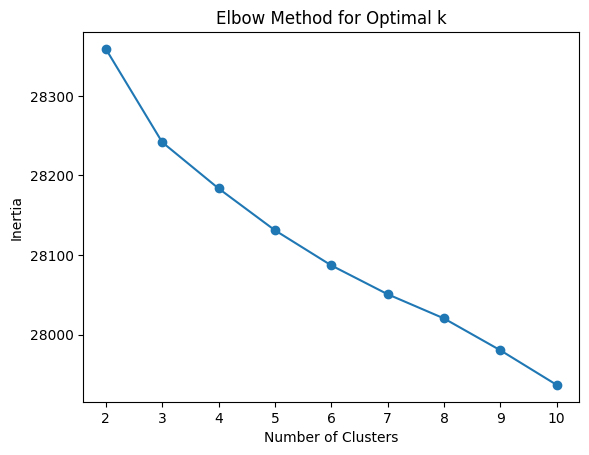

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different cluster counts
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Explanation:
*  Inertia measures how tightly the clusters are formed. Lower inertia is better.

*   The "elbow" in the plot indicates the optimal number of clusters (e.g., k=5).



# Step 5: Apply K-Means Clustering


In [79]:
# Apply K-Means with optimal k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the reviews
import pandas as pd
df = pd.DataFrame({'Review': reviews, 'Cluster': clusters})
print(df.head())

                                              Review  Cluster
0  One of the other reviewers has mentioned that ...        3
1  A wonderful little production The filming tech...        2
2  I thought this was a wonderful way to spend ti...        2
3  Basically theres a family where a little boy J...        2
4  Petter Matteis Love in the Time of Money is a ...        2


# Step 6: Visualize Clusters
We will use PCA to reduce the dimensionality of the TF-IDF matrix and visualize the clusters in 2D.

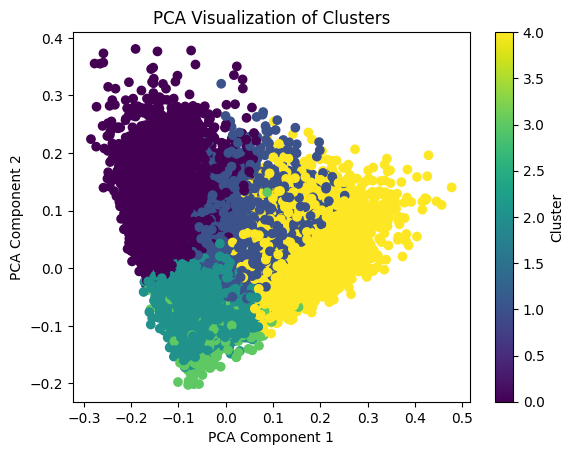

In [80]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Explanation:






*   PCA reduces the 2,000-dimensional TF-IDF matrix to 2 dimensions for visualization.

*   Each point represents a review, and colors represent clusters.


# Step 7: Interpret Clusters
We will analyze the top words in each cluster to understand their themes.

In [81]:
# Get feature names (words) from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Print top words per cluster
for i in range(5):
    print(f"\nCluster {i} Top Words:")
    cluster_center = kmeans.cluster_centers_[i]
    top_indices = cluster_center.argsort()[-10:][::-1]  # Top 10 words
    print([feature_names[idx] for idx in top_indices])


Cluster 0 Top Words:
['film', 'films', 'like', 'good', 'just', 'story', 'movie', 'great', 'time', 'really']

Cluster 1 Top Words:
['movie', 'bad', 'just', 'like', 'really', 'film', 'good', 'dont', 'movies', 'people']

Cluster 2 Top Words:
['film', 'movie', 'story', 'great', 'time', 'like', 'good', 'love', 'life', 'best']

Cluster 3 Top Words:
['series', 'episode', 'episodes', 'tv', 'season', 'just', 'like', 'shows', 'good', 'characters']

Cluster 4 Top Words:
['movie', 'movies', 'good', 'like', 'just', 'really', 'watch', 'great', 'time', 'dont']


# Step 8: Evaluate Clustering
Since we don't have ground truth labels, we can use Silhouette Score to evaluate clustering qualit

In [82]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.5f}")

Silhouette Score: 0.00295
